### Desafío - Inferencia de tópicos con EM

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

### Descripción
* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los csv se encuentra en la carpeta dump.
* Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, el objetivo del ejercicio es generar un modelo probabilístico que pueda identificar el género musical más probable dado la letra de una canción. Para ello implementaremos un modelo conocido como Latent Dirichlet Allocation que hace uso de una variante del algoritmo EM para inferir clases latentes a partir de una matriz de documentos.

### Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos numpy , pandas , matplotlib , seaborn , glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump .
* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.
* Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
plt.style.use('seaborn')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
rutas = glob.glob(os.getcwd()+'/dump/*.csv')
datas = []
for ruta in rutas:
    df = pd.read_csv(ruta).drop(columns='Unnamed: 0')
    datas.append(df)

In [4]:
df = pd.concat(datas)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9489 entries, 0 to 129
Data columns (total 4 columns):
0    9489 non-null object
1    9489 non-null object
2    9489 non-null object
3    9489 non-null object
dtypes: object(4)
memory usage: 370.7+ KB


In [5]:
df.columns=['Artista','Genero','Cancion','Letra']
df.head()

,Artista,Genero,Cancion,Letra
0,Public Enemy,hiphop,You're Gonna Get Yours,"(Flavor Flav) \n Oh-oh Chuck, they out to get ..."
1,Public Enemy,hiphop,Sophisticated Bitch,"That woman in the corner, cold playin' the rol..."
2,Public Enemy,hiphop,Miuzi Weighs A Ton,"Yo Chuck, run a power move on them \n (Yeah) \..."
3,Public Enemy,hiphop,Timebomb,"(Intro - Flavor Flav) \n Hey, Chuck, we got so..."
4,Public Enemy,hiphop,Too Much Posse,(Intro - Flavor Flav) \n What do you got to sa...


In [6]:
df.Genero.value_counts()

rock      4140
hiphop    2535
metal     1582
pop       1232
Name: Genero, dtype: int64

### Ejercicio 2: Matriz de ocurrencias
* Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la librería sklearn .
* Aplique la clase para extraer las 5000 palabras más repetidas en toda la base de datos.
* Con la clase inicializada, incorpore las letras con el método fit_transform y guarde los resultados en un nuevo objeto

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

### Ejercicio 3: Entrenamiento del Modelo
* Importe sklearn.decomposition.LatentDirichletAllocation y sklearn.model_selection.GridSearchCV .
* Genere una búsqueda de grilla con los siguientes hiperparámetros:
    * n_components: [5, 10, 15] .
    * learning_decay: [0.7, 0.5] .
* Entrene la búsqueda de grilla con las letras en un formato vectorizado con CountVectorizer .
* Reporte brevemente cuál es la mejor combinación de hiperparámetros

##### Digresión: Latent Dirichlet Allocation
* Latent Dirichlet Allocatio (LDA) es un modelo probabilístico generativo basado en Inferencia Variacional EM. La principal utilidad de éste es la identificación de tópicos en un corpus de texto. 
* El proceso de inferencia se puede resumir en los siguientes pasos:
    * Cada documento dentro del corpus se puede entender como una mezcla de tópicos comunes a nivel de corpus.
    * Esta mezcla de tópicos es latente $\leadsto$ Sólo observamos los documentos registrados y sus palabras. La API de sklearn.decomposition.LatentDirichletAllocation presenta la misma funcionalidad de todo modelo de sklearn. Algunos puntos a considerar en la inicialización de la clase son:
        * n_components : Cantidad de tópicos a inferir en un corpus.
        * learning_method : Forma en la que entran los datos en entrenamiento. Cuando es 'batch' , se ingresa la matriz de entrenamiento completa. Cuando es 'online' , la matriz de entrenamiento ingresa de manera secuencial en parcelas pequeñas.
        * learning_decay : Tasa de aprendizaje en la función de pérdida. Cuando se implementa con learning_method='online', el modelo se entrena con Gradiente Estocástico Descendente.
        * Perplejidad: Busca aproximar el número óptimo de tópicos a inferir. Técnicamente evalúa qué tan bien predice una muestra específica. En funcion a un número de tópicos, define la distribución teórica de palabras representada por los tópicos y la compara con la ocurrencia empírica de palabras en tópicos

In [8]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [1]:
import nltk
from nltk.corpus import stopwords

In [3]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer
from string import punctuation

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
stemmer = SnowballStemmer('spanish')
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
def tokenize(text):
    text = ''.join([c for c in text if c not in non_words])
    tokens =  word_tokenize(text)

    # stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems

In [4]:
stemmer = SnowballStemmer('spanish')

non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))

In [9]:
vectorizer = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize,
                lowercase = True,
                stop_words = spanish_stopwords)

In [2]:
spanish_stopwords = stopwords.words('spanish')

In [9]:
lda = LatentDirichletAllocation(learning_method='online')

In [10]:
count_vectorizer=CountVectorizer(stop_words='english',max_features=5000)
count_vectorizer_fit = count_vectorizer.fit_transform(df.Letra)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df['Letra'],df['Genero'],test_size=.33,random_state=11238)

In [12]:
parameter_candidates = [
  {'n_components': [5, 10, 15], 'learning_decay': [0.7, 0.5]}
]

In [13]:
grid = GridSearchCV(lda, parameter_candidates, cv=2, n_jobs=-1)

In [25]:
%%time
grid.fit(count_vectorizer_fit)

CPU times: user 2min 19s, sys: 2.43 s, total: 2min 22s
Wall time: 5min 42s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='online',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                       

In [26]:
grid.best_params_

{'learning_decay': 0.7, 'n_components': 5}

### Ejercicio 4 : Inferencia e Identificación de Tópicos
* En base a la mejor combinación de hiperparámetros, entrene el modelo con la matriz de atributos de las letras.
* Para identificar de qué se trata cada tópico, necesitamos identificar las principales 15 palabras asociadas con éste. Puede implementar la siguiente línea de código para identificar las principales palabras en un tópico:

```python
# mediante .components_ podemos extraer una matriz que entrega las distribución de palabras por cada tópico.

for topic_id, topic_name in enumerate(fit_best_lda.components_):
    # para cada tópico
    print("tópico: {}".format(topic_id + 1))
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([counter.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))
```

* Comente a qué tópicos está asociada cada clase inferida.

In [27]:
for topic_id, topic_name in enumerate(grid.best_estimator_.components_):
    # para cada tópico
    print("tópico: {}".format(topic_id + 1))
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([count_vectorizer.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))

tópico: 1
don know just got ll like want say ve time cause let gonna make way
tópico: 2
love oh yeah baby come hey ooh girl ah let night tonight got ll like
tópico: 3
shit like fuck nigga yeah niggas ain got bitch ya don la yo ass know
tópico: 4
like got man yo em cause ain don know just shit new make right black
tópico: 5
life world god ll eyes away time die death light dead blood day soul heart


tópico: 1

    Genero mas neutral, puede ser rock sube o pop
tópico: 2

    Es de topico romantica, posiblemente rock romantico
tópico: 3

    Es de tipo mas urbano, muy probable rap
tópico: 4

    Al igual que el topico 1 es algo dificil ubicarlo un un topico
tópico: 5

    Tema mas oscuro, probablemente metal

### Ejercicio 5: Identificación de probabilidades
* En base a la información generada, es posible identificar cuales van a ser los géneros más probables de ocurrir para un artista.
* Para ello necesitamos guardar la probabilidad de cada canción en nuestra base de datos original. 
* Podemos implementar esto de la siguiente manera:
    
```python    
# generamos una transformación de los datos a distribución de tópico por palabra en el documento
fit_best_lda = best_lda.transform(transformed_feats)
# estra transformación la podemos coercionar a un dataframe de la siguiente manera
topics_for_each_doc = pd.DataFrame(
                                    # pasamos esta matriz y la redondeamos en 3 decimales
                                    np.round(fit_best_lda, 3),
                                    # agregamos un índice
                                    index=df_lyrics.index
                                    )
#agregamos identificadores de columna
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, best_lda.n_components + 1)))
# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df_lyrics, topics_for_each_doc], axis=1)
# argmax en la matriz de tópicos
concatenated_df['highest_topic'] = np.argmax(docs_topics.values, axis=1) + 1   

```

* Genere una matriz de correlaciones entre la probabilidad de tópicos inferidos. Comente brevemente cuales son las principales asociaciones existentes.

* Con esta nueva base de datos, identifique las probabilidades de pertenencia para un artista específico.

* Grafique la distribución de las probabilidades para algún artista en específico.

In [28]:
fit_best_lda = grid.best_estimator_.transform(count_vectorizer_fit)

In [29]:
fit_best_lda

array([[3.12832340e-01, 8.02214986e-04, 8.00575740e-04, 6.57093654e-01,
        2.84712153e-02],
       [3.98254480e-01, 9.68753129e-04, 1.17754281e-01, 4.10393405e-01,
        7.26290809e-02],
       [8.36375897e-02, 2.16959369e-02, 8.56505073e-04, 8.71425468e-01,
        2.23845000e-02],
       ...,
       [2.93586413e-01, 8.12774318e-04, 8.03817865e-04, 7.03990995e-01,
        8.05999816e-04],
       [7.24605227e-04, 7.28742790e-04, 8.20964325e-01, 1.04055910e-01,
        7.35264172e-02],
       [7.25105045e-02, 8.50234247e-04, 3.93292467e-02, 8.02744721e-01,
        8.45652940e-02]])

In [30]:
topics_for_each_doc = pd.DataFrame(
                                    # pasamos esta matriz y la redondeamos en 3 decimales
                                    np.round(fit_best_lda, 3),
                                    # agregamos un índice
                                    index=df.index
                                    )

In [31]:
topics_for_each_doc.head()

,0,1,2,3,4
0,0.313,0.001,0.001,0.657,0.028
1,0.398,0.001,0.118,0.410,0.073
2,0.084,0.022,0.001,0.871,0.022
3,0.196,0.064,0.001,0.738,0.001
4,0.236,0.036,0.092,0.561,0.075


In [32]:
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, grid.best_estimator_.n_components + 1)))

In [33]:
topics_for_each_doc.head()

,T: 1,T: 2,T: 3,T: 4,T: 5
0,0.313,0.001,0.001,0.657,0.028
1,0.398,0.001,0.118,0.410,0.073
2,0.084,0.022,0.001,0.871,0.022
3,0.196,0.064,0.001,0.738,0.001
4,0.236,0.036,0.092,0.561,0.075


In [34]:
concatenated_df = pd.concat([df, topics_for_each_doc], axis=1)

In [35]:
concatenated_df

,Artista,Genero,Cancion,Letra,T: 1,T: 2,T: 3,T: 4,T: 5
0,Public Enemy,hiphop,You're Gonna Get Yours,"(Flavor Flav) \n Oh-oh Chuck, they out to get ...",0.313,0.001,0.001,0.657,0.028
1,Public Enemy,hiphop,Sophisticated Bitch,"That woman in the corner, cold playin' the rol...",0.398,0.001,0.118,0.410,0.073
2,Public Enemy,hiphop,Miuzi Weighs A Ton,"Yo Chuck, run a power move on them \n (Yeah) \...",0.084,0.022,0.001,0.871,0.022
3,Public Enemy,hiphop,Timebomb,"(Intro - Flavor Flav) \n Hey, Chuck, we got so...",0.196,0.064,0.001,0.738,0.001
4,Public Enemy,hiphop,Too Much Posse,(Intro - Flavor Flav) \n What do you got to sa...,0.236,0.036,0.092,0.561,0.075
5,Public Enemy,hiphop,Rightstarter (Message To A Black Man),"Mind over matter, mouth in motion \n Can't def...",0.571,0.001,0.001,0.172,0.255
6,Public Enemy,hiphop,Public Enemy No. 1,"(Intro: Flavor Flav) \n Yo Chuck, bust a move ...",0.263,0.013,0.001,0.713,0.011
7,Public Enemy,hiphop,M.P.E.,I'm cold gettin' busy while I'm shakin' you do...,0.101,0.123,0.001,0.774,0.001
8,Public Enemy,hiphop,Yo! Bum Rush The Show,"I am taking no prisoners, taking no shorts \n ...",0.387,0.035,0.105,0.433,0.039
9,Public Enemy,hiphop,Raise The Roof,"Raise your hands, so we can \n Raise the roof,...",0.144,0.001,0.001,0.525,0.329


In [37]:
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values, axis=1) + 1 

In [39]:
concatenated_df.sample()

,Artista,Genero,Cancion,Letra,T: 1,T: 2,T: 3,T: 4,T: 5,highest_topic
34,Meshuggah,metal,Glints Collide,"Winds that shine a bright, blinding dark. Kero...",0.002,0.002,0.002,0.002,0.991,5


Genere una matriz de correlaciones entre la probabilidad de tópicos inferidos. Comente brevemente cuales son las principales asociaciones existentes.

Con esta nueva base de datos, identifique las probabilidades de pertenencia para un artista específico.

Grafique la distribución de las probabilidades para algún artista en específico.

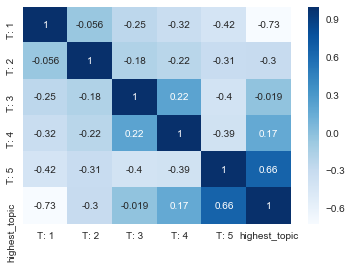

In [40]:
sns.heatmap(concatenated_df.corr(), cmap='Blues', annot=True);

Se observa que el que tiene una mayor probabilidad de ser  escogido es el topico 5 que se habia identificado como metal

In [68]:
#Con esta nueva base de datos, identifique las probabilidades de pertenencia para un artista específico.
Artista = concatenated_df.sample()['Artista']
Artista = np.array(Artista)[0]
print('El artista correspode a:',Artista)
print('\nLas probabilidades a cada topico son')
concatenated_df[concatenated_df['Artista']==Artista]['highest_topic'].value_counts('%')

El artista correspode a: System of a Down

Las probabilidades a cada topico son


5    0.521368
1    0.256410
3    0.085470
2    0.085470
4    0.051282
Name: highest_topic, dtype: float64

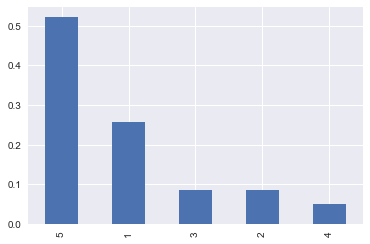

In [70]:
#Grafique la distribución de las probabilidades para algún artista en específico
concatenated_df[concatenated_df['Artista']==Artista]['highest_topic'].value_counts('%').plot(kind='bar')

##### Comentarios adicionales
Por tema de tiempo de ejecucion se realizo un modelo simple ya que se entiende que entre mas complejo sea este mas tiempo tardara en entrenarse y para temas pedagogicos se estimo que con un modelo simple en tiempo de computo era suficiente